In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\jarvi\.vscode\Python\TNSIF_AIML_DBIT\student_performance.csv")


In [2]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High


In [3]:
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Attendance
count,20.000000,20.000000,20.000000,20.000000
mean,4.600000,60.650000,6.500000,78.950000
std,2.414866,18.345443,1.051315,11.874231
min,1.000000,30.000000,5.000000,55.000000
25%,2.750000,46.500000,6.000000,70.000000
50%,4.500000,59.000000,6.500000,80.000000
75%,6.250000,75.750000,7.000000,88.500000
max,9.000000,92.000000,8.000000,96.000000


In [4]:
print(df.isnull().sum())

Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64


In [5]:
# Convert categorical variables
df['Extracurricular'] = df['Extracurricular'].map({'Yes': 1, 'No': 0})
df['Internet_Access'] = df['Internet_Access'].map({'Yes': 1, 'No': 0})


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Example: Encoding 'Extracurricular' and 'Internet_Access'
df['Extracurricular'] = le.fit_transform(df['Extracurricular'])
df['Internet_Access'] = le.fit_transform(df['Internet_Access'])




In [10]:
df.head()


,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,Low
1,5,60,1,7,1,80,Medium
2,8,85,0,8,1,90,High
3,1,35,0,5,0,60,Low
4,6,75,1,7,1,85,High


In [11]:

X = df.drop('Performance', axis=1)

y = df['Performance']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (20, 6)
y shape: (20,)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)


In [37]:
# using gini index

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)

dt_model.fit(X_train, y_train)

print("Decision Tree trained successfully!")


Decision Tree trained successfully!


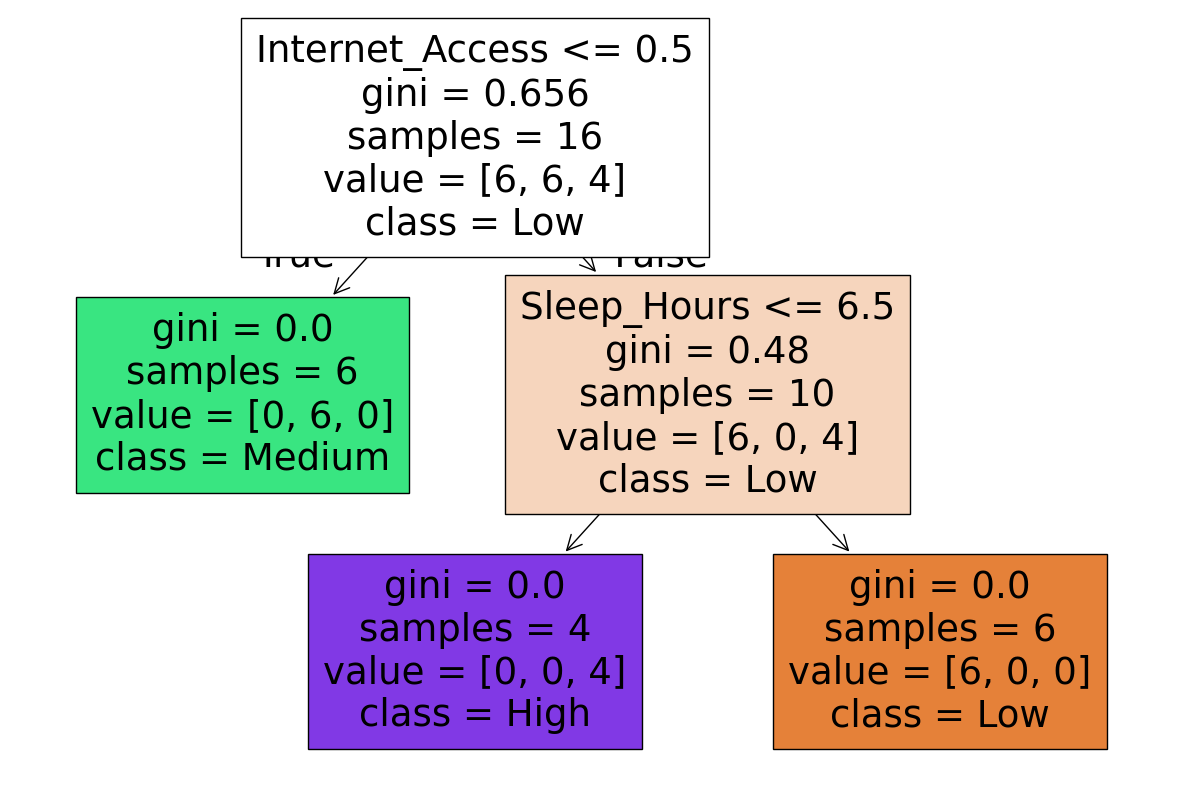

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Low','Medium','High'], filled=True)
plt.show()



In [36]:
# Predict on test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt_model.predict(X_test)

# Evaluate
print("=== Decision Tree (Gini) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Decision Tree (Gini) Evaluation ===
Accuracy: 0.25

Confusion Matrix:
 [[1 0 0]
 [0 0 1]
 [2 0 0]]

Classification Report:
               precision    recall  f1-score   support

        High       0.33      1.00      0.50         1
         Low       0.00      0.00      0.00         1
      Medium       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.11      0.33      0.17         4
weighted avg       0.08      0.25      0.12         4



C:\Users\jarvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jarvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jarvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas

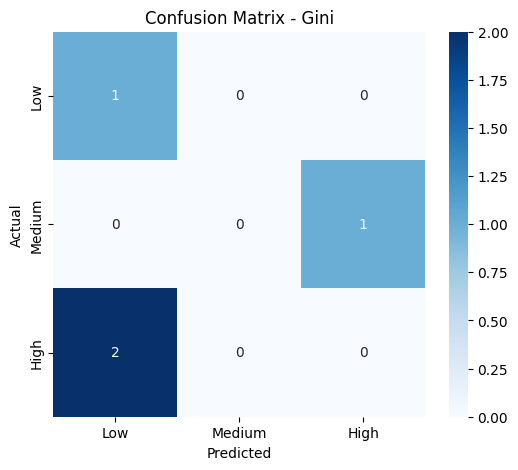

In [20]:
# Confusion matrix

import seaborn as sns


cm_gini = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gini')
plt.show()


In [30]:


# Train Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)






,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


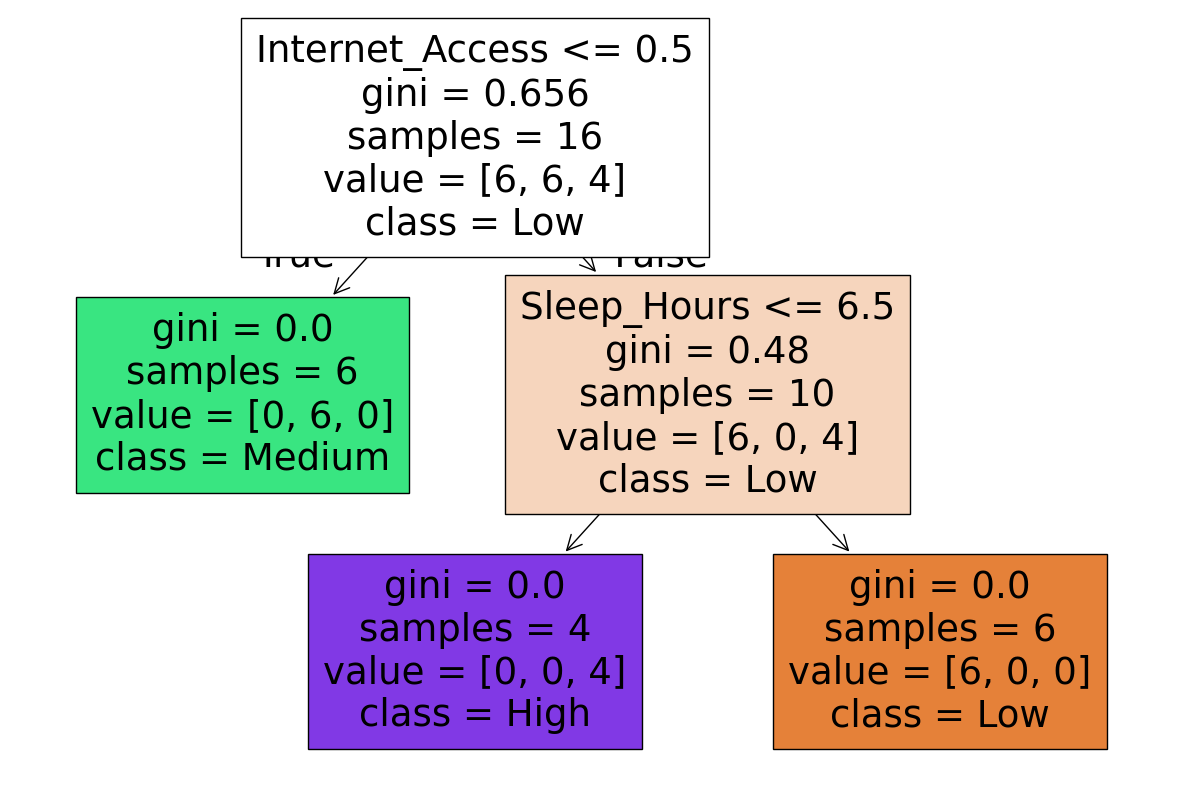

=== Decision Tree (Entropy) Evaluation ===
Accuracy: 0.25

Confusion Matrix:
 [[1 0 0]
 [0 0 1]
 [2 0 0]]

Classification Report:
               precision    recall  f1-score   support

        High       0.33      1.00      0.50         1
         Low       0.00      0.00      0.00         1
      Medium       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.11      0.33      0.17         4
weighted avg       0.08      0.25      0.12         4



C:\Users\jarvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jarvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\jarvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas

In [34]:
# Using entropy
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Low','Medium','High'], filled=True)
plt.show()


# Predict on test set

y_pred_entropy = dt_entropy.predict(X_test)

# Evaluate
print("=== Decision Tree (Entropy) Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

In [40]:


# Try different depths for gini
for depth in range(1, 6):
    dt_model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Max Depth = {depth} --> Test Accuracy = {acc:.2f}")


Max Depth = 1 --> Test Accuracy = 0.25
Max Depth = 2 --> Test Accuracy = 0.25
Max Depth = 3 --> Test Accuracy = 0.25
Max Depth = 4 --> Test Accuracy = 0.25
Max Depth = 5 --> Test Accuracy = 0.25


In [42]:


# Try different depths for entropy
for depth in range(1, 6):
    dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Max Depth = {depth} --> Test Accuracy = {acc:.2f}")


Max Depth = 1 --> Test Accuracy = 0.25
Max Depth = 2 --> Test Accuracy = 0.25
Max Depth = 3 --> Test Accuracy = 0.25
Max Depth = 4 --> Test Accuracy = 0.25
Max Depth = 5 --> Test Accuracy = 0.25


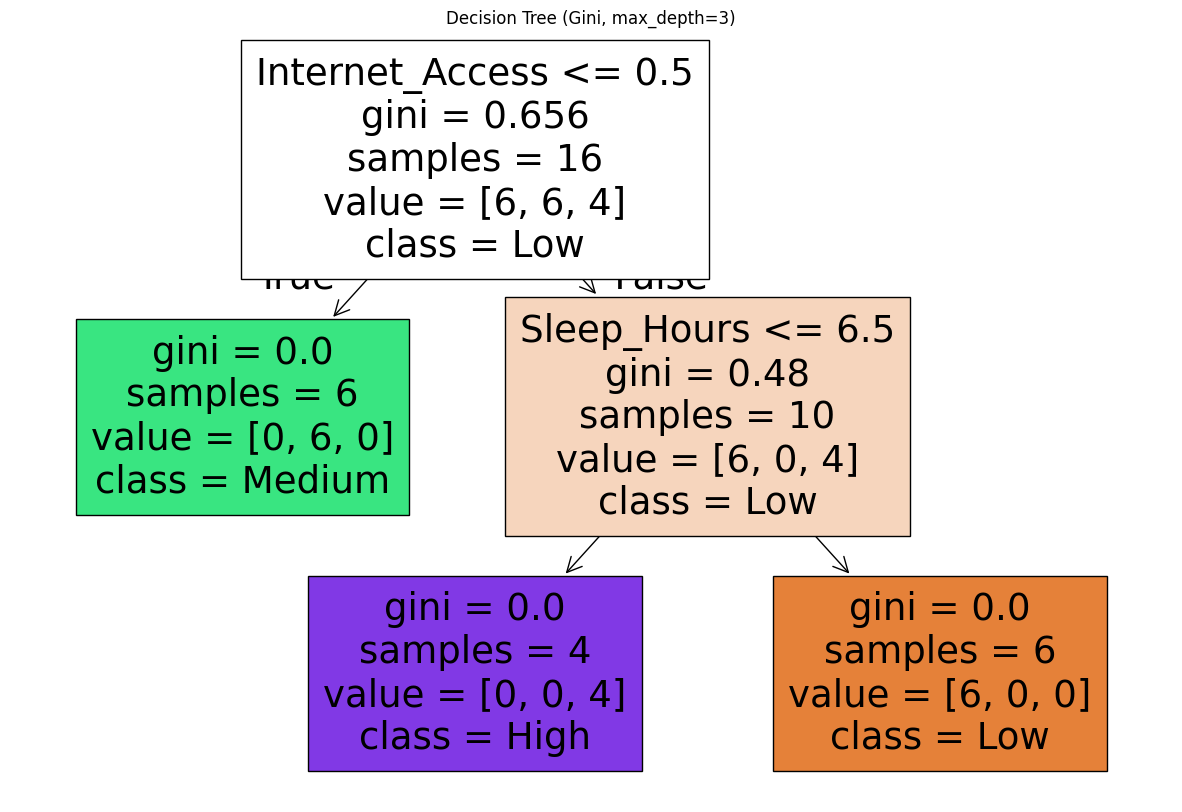

In [43]:
import matplotlib.pyplot as plt
from sklearn import tree

# Use the best depth (say depth=3)
dt_gini_best = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_gini_best.fit(X_train, y_train)

plt.figure(figsize=(15,10))
tree.plot_tree(dt_gini_best, feature_names=X.columns, class_names=['Low','Medium','High'], filled=True)
plt.title("Decision Tree (Gini, max_depth=3)")
plt.show()


In [44]:
# Feature importance


feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_gini_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp)


           Feature  Importance
4  Internet_Access    0.542857
3      Sleep_Hours    0.457143
1  Previous_Scores    0.000000
0    Hours_Studied    0.000000
2  Extracurricular    0.000000
5       Attendance    0.000000


In [ ]:
# 13.	13. Which features influence student performance the most?

# Most important features:

# Internet_Access (0.54) → Whether a student has internet access strongly influences performance.

# Sleep_Hours (0.46) → How many hours a student sleeps also plays a big role.
# 14. If you were a teacher, how would you use these insights to help students improve?
# if i was  a 